In [1]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import numpy as np
from osgeo import gdal,osr,ogr
import matplotlib.pyplot as plt
import gdal
import rasterio

In [4]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
# import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader
import matplotlib.colors as colors
#from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
#                 cartopy_ylim, latlon_coords)

In [5]:
control=xr.open_dataset('/mnt/e/wrf_tibet/test/pre_test2003summer/wrfout_tibet_2003_summer_control')

In [6]:
rm_grass=xr.open_dataset('/mnt/f/wrf/test_2003_summer/wrfout_tibet_2003_summer_rm_grass')

In [7]:
control

KeyboardInterrupt: 

In [ ]:
# no spin up

In [8]:
def plot_var_effect(varibles):
    var_control=control[varibles]
    var_control_monthly=var_control.groupby('XTIME.season').mean()
    var_rm_grass=rm_grass[varibles]
    var_rm_grass_monthly=var_rm_grass.groupby('XTIME.season').mean()
    var=var_control_monthly[0]-var_rm_grass_monthly[0]
    var.plot()

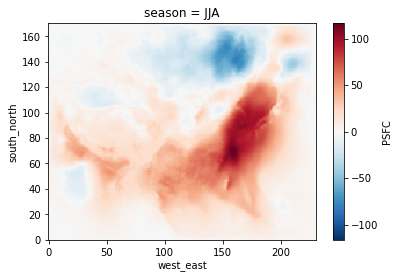

In [9]:
plot_var_effect('PSFC')

In [10]:
t_control=control['T']
t_control_monthly=t_control.groupby('XTIME.season').mean()

In [11]:
t_rm_grass=rm_grass['T']
t_rm_grass_monthly=t_rm_grass.groupby('XTIME.season').mean()

KeyboardInterrupt: 

In [ ]:
#level a temperature change
grass_effect=t_rm_grass_monthly[0][0]-t_control_monthly[0][0]
-grass_effect.plot()

In [ ]:
# precipitation
pre_control=control['RAINC']
pre_control_monthly=pre_control.groupby('XTIME.season').mean()

In [ ]:
pre_rm_grass=rm_grass['RAINC']
pre_rm_grass_monthly=pre_rm_grass.groupby('XTIME.season').mean()

In [ ]:
grass_pr=pre_rm_grass_monthly[0]-pre_control_monthly[0]
grass_pr.plot()

In [ ]:
t2_control=control['T2'].groupby('XTIME.season').mean()

In [ ]:
t2_control=control['T2'].groupby('XTIME.season').mean()
t2_rm_grass=rm_grass['T2'].groupby('XTIME.season').mean()
t2_effect=t2_control-t2_rm_grass

In [ ]:
t2_effect

In [ ]:
t2_effect.plot()

In [ ]:
ncfile = Dataset("/mnt/e/wrf_tibet/test/tibet/wrfinput_d01")
slp = getvar(ncfile, "HGT")

In [ ]:
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader
import matplotlib.colors as colors

In [ ]:
slp = getvar(ncfile, "HGT")
smooth=smooth2d(slp, 3, cenweight=4)
smooth_slp = smooth2d(t2_effect[0], 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)


fig = plt.figure(figsize=(12,6))

# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)
#ax.set_xticks(np.linspace(-150,-50, 3), crs=ccrs.cart_proj())
#ax.set_xticklabels(np.linspace(-150,-50, 3),fontsize=16)

#Make the contour outlines and filled contours for the smoothed sea level
# pressure.
#plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
#            transform=crs.PlateCarree())
p=plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 50,
             transform=crs.PlateCarree(),
             cmap='bwr'
#             cmap=terrain_map
            )

# Add a color bar
cb=plt.colorbar(p,ticks=[-2.0,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2.0])
#cb.ax.set_yticklabels([-2.0,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2.0],fontsize=14)
# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth))
ax.set_ylim(cartopy_ylim(smooth))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Effect of Tibetan grassland on 2m tempereture in 2003 JJA")


#plt.savefig('/mnt/e/wrf_tibet/figure/domain.jpg',bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
slp = getvar(ncfile, "HGT")
smooth=smooth2d(slp, 3, cenweight=4)
smooth_slp = smooth2d(-grass_effect, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)


fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)
#ax.set_xticks(np.linspace(-150,-50, 3), crs=ccrs.cart_proj())
#ax.set_xticklabels(np.linspace(-150,-50, 3),fontsize=16)

#Make the contour outlines and filled contours for the smoothed sea level
# pressure.
#plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
#            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 50,
             transform=crs.PlateCarree(),
             cmap='bwr'
#             cmap=terrain_map
            )

# Add a color bar
plt.colorbar(ax=ax)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth))
ax.set_ylim(cartopy_ylim(smooth))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Effects of Tibetan grass on temperature(model level 1) in JJA,2003")


#plt.savefig('/mnt/e/wrf_tibet/figure/domain.jpg',bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np


In [ ]:
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np

def draw_var(input_data,title_text):
    projection = ccrs.PlateCarree()
    axes_class = (GeoAxes,
                  dict(map_projection=get_cartopy(slp)))
    lats, lons = latlon_coords(slp)
    data=smooth2d(input_data, 3, cenweight=4)

    fig = plt.figure(figsize=(12,6))
    ax = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(1, 1),
                    axes_pad=0.6,
                    cbar_location='right',
                    cbar_mode='single',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    label_mode='')  # note the empty label_mode

# Download and add the states and coastlines
    states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
    ax[0].add_feature(states, linewidth=.5, edgecolor="black")
    ax[0].coastlines('50m', linewidth=0.8)
#ax.set_xticks(np.linspace(-150,-50, 3), crs=ccrs.cart_proj())
#ax.set_xticklabels(np.linspace(-150,-50, 3),fontsize=16)

#Make the contour outlines and filled contours for the smoothed sea level
# pressure.
#plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
#            transform=crs.PlateCarree())
    p=ax[0].contourf(to_np(lons), to_np(lats), to_np(data), 50,
            vmin=-1,
            vmax=1,
            transform=crs.PlateCarree(),
            cmap='bwr')
#             cmap=terrain_map
    cb=ax.cbar_axes[0].colorbar(p,ticks=[-2.0,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2.0])
    cb.ax.tick_params(axis='y',direction='in')
    cb.ax.set_yticklabels([-2.0,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2.0],fontsize=9)
    cb.set_label_text(r'$\Delta$LST(℃)',fontsize=18)

# Set the map bounds
    ax[0].set_xlim(cartopy_xlim(smooth))
    ax[0].set_ylim(cartopy_ylim(smooth))

# Add the gridlines
    ax[0].gridlines(color="black", linestyle="dotted")
    ax[0].set_title(title_text,fontsize=18)
#    plt.title("Effects of Tibetan grass on temperature(model level 1) in JJA,2003")
    plt.show()

In [ ]:
draw_var(-grass_effect,"Effects of Tibetan grass on temperature(model level 1) in JJA,2003")

In [ ]:
draw_var(t2_effect[0],"Effects of Tibetan grass on 2m temperature in JJA,2003")